# Limb Darkening Correction
Using quiet sun

In [2]:
from module import readFitsBz2

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

In [3]:
from IPython.display import clear_output

folder = 'data/L2_quiet/'

quiet_list = []
i=0
for filename in os.listdir(folder):
    quiet_list.append(readFitsBz2(folder + filename))
    i+=1
    clear_output(wait=False)
    print(i)

309


In [4]:
mean = np.empty(quiet_list[0].data.shape)
for hdu in quiet_list:
    mean += hdu.data/float(len(quiet_list))

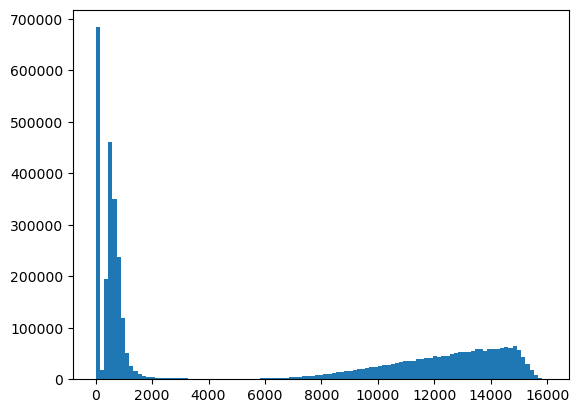

In [5]:
plt.hist(mean.flatten(), bins='auto');

In [6]:
ret,thresh = cv.threshold(mean,4000,1,cv.THRESH_BINARY_INV)

In [7]:
mean

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
quiet_inv = np.invert(mean.astype(np.uint16))

blur = cv.blur(quiet_inv, (49,49)).astype(np.float32)

blur[thresh==1]=np.nan


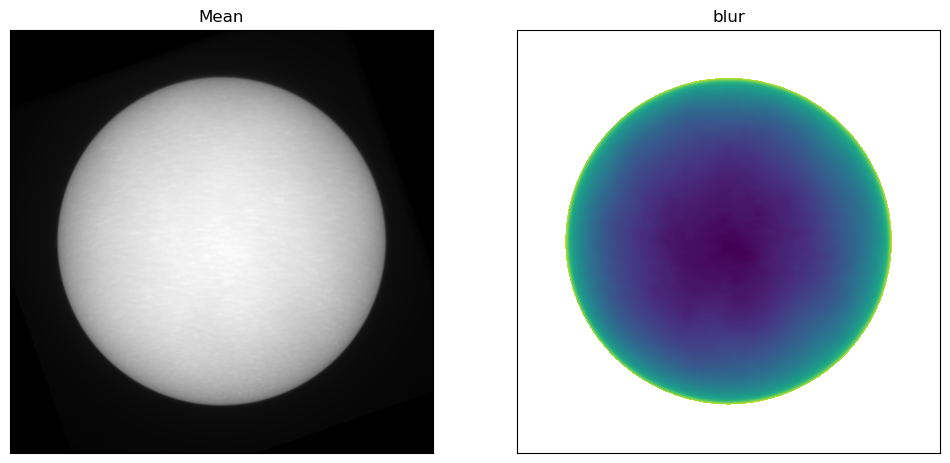

In [16]:
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(mean, cmap='gray', origin='lower')
plt.title('Mean'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(blur, origin='lower')
plt.title('blur'), plt.xticks([]), plt.yticks([]);

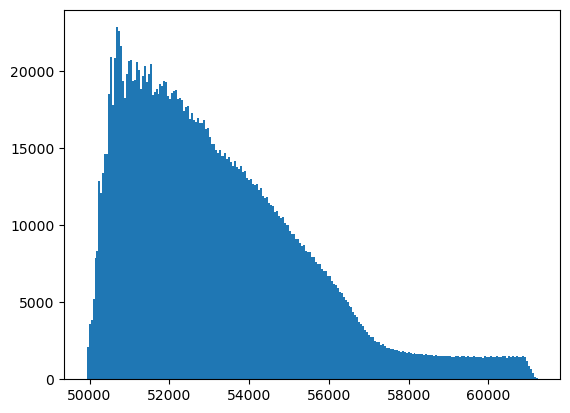

In [10]:
plt.hist(blur.flatten(), bins='auto');

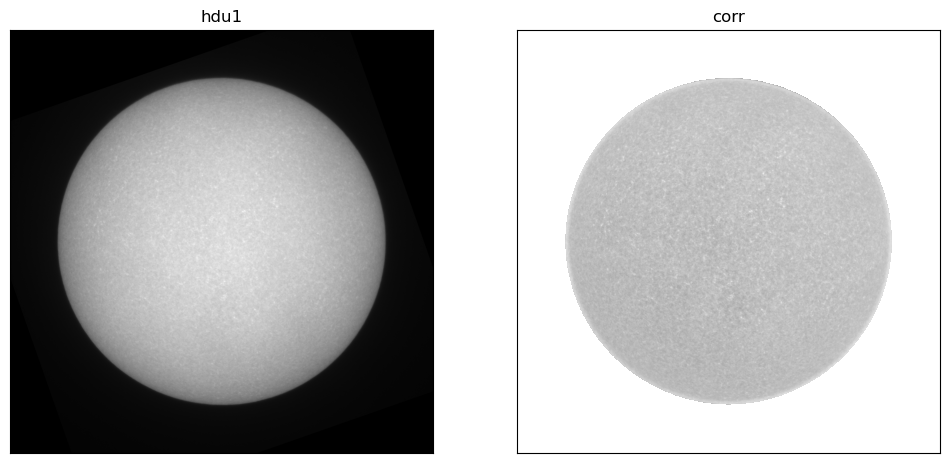

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(quiet_list[0].data, cmap='gray', origin='lower')
plt.title('hdu1'), plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(quiet_list[0].data+blur, cmap='gray', origin='lower')
plt.title('corr'), plt.xticks([]), plt.yticks([]);